In [1]:
import requests, csv
from bs4 import BeautifulSoup
from os import path, listdir
import pandas as pd
import matplotlib.pyplot as plt

import scripts.scraper as scraper
import scripts.data_exploration as data_exploration

# Scraping

In [2]:
# scraper.scrape_urls()

# Data exploration

In [3]:
df = data_exploration.make_dataframe()

3 files founded
Total of reviews : 68


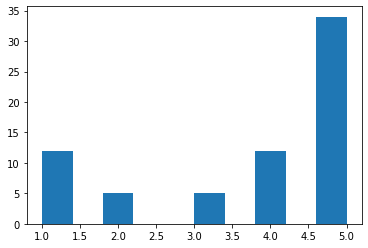

In [4]:
plt.hist(df['rating']);